In [1]:
!pip install keras

In [2]:
!pip install tensorflow
import pickle
import numpy as np
# Keras library imports for tokenization and model building
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding # Import Embedding from tensorflow.keras.layers
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM

In [3]:

with open("Train-Data Set.txt", "rb") as fp:
    Train_data = pickle.load(fp)

In [4]:

with open("Test-Data Set.txt", "rb") as fp:
    Test_data = pickle.load(fp)

In [5]:

import numpy as np
import pandas as pd


In [6]:

Train_data


[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [7]:
Test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [8]:
' '.join(Train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
' '.join(Train_data[0][1])

'Is Sandra in the hallway ?'

In [10]:
Train_data[0][2]

'no'

In [11]:
#Step 2: Data Exploration
"""As we can see, the type of train and test data is list.
The length of train and test data is 10000 and 1000 respectively.
 The data has stories, questions and answers."""



'As we can see, the type of train and test data is list. \nThe length of train and test data is 10000 and 1000 respectively.\n The data has stories, questions and answers.'

In [12]:
type(Test_data)

list

In [13]:

type(Train_data)

list

In [14]:
len(Test_data)

1000

In [15]:
len(Train_data)

10000

In [16]:
#Step 3: Setting up vocabulary of all words.
"""A vocabulary dictionary is set up to hold the vocab words."""



'A vocabulary dictionary is set up to hold the vocab words.'

In [17]:
vocab = set()
all_data = Test_data + Train_data

for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [18]:
vocab.add('yes')
vocab.add('no')

In [19]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [20]:
max_story_len = max([len(data[0])for data in all_data])
max_story_len


156

In [21]:
#Step 4: Vectorizing the data
"""We would be using Keras library for processing this vocab.
 Keras is an open source neural network library written in Python.
  It could run on top of TensorFlow The Tokenzier is constructed and is fit on the text documents
  using fit_on_texts . After the fit, Tokenzier allows us to use word_index (A dictionary of words
   and their uniquely assigned integers) on the documents. Each token(word) in the story is assigned
    an integer. We can then check the length of training data story text and length of story sequence."""

'We would be using Keras library for processing this vocab.\n Keras is an open source neural network library written in Python.\n  It could run on top of TensorFlow The Tokenzier is constructed and is fit on the text documents \n  using fit_on_texts . After the fit, Tokenzier allows us to use word_index (A dictionary of words\n   and their uniquely assigned integers) on the documents. Each token(word) in the story is assigned\n    an integer. We can then check the length of training data story text and length of story sequence.'

In [22]:
#vectorizing data means to convert it to numerical

In [23]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'.': 1,
 'no': 2,
 'to': 3,
 'travelled': 4,
 'up': 5,
 'dropped': 6,
 'john': 7,
 'bathroom': 8,
 'in': 9,
 'put': 10,
 'grabbed': 11,
 'journeyed': 12,
 'garden': 13,
 'picked': 14,
 'office': 15,
 'discarded': 16,
 '?': 17,
 'football': 18,
 'milk': 19,
 'mary': 20,
 'the': 21,
 'left': 22,
 'sandra': 23,
 'hallway': 24,
 'went': 25,
 'yes': 26,
 'daniel': 27,
 'there': 28,
 'moved': 29,
 'back': 30,
 'is': 31,
 'got': 32,
 'bedroom': 33,
 'down': 34,
 'kitchen': 35,
 'took': 36,
 'apple': 37}

In [24]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in Train_data :
  train_story_text.append(story)
  train_question_text.append(question)

In [25]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [26]:
len(train_story_text)

10000

In [28]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [29]:
train_question_text

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'garden', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', '

In [30]:
train_answers

[]

In [31]:
len(vocab)

37

In [32]:
vocab_len = len(vocab)+1

In [33]:
max_ques_len = max([len(data[1])for data in all_data])
max_ques_len

6

In [34]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [35]:
def vectorize_stories(data, word_index = tokenizer.word_index,
                      max_story_len = max_story_len, max_ques_len = max_ques_len):

         X = []
         Xq = []
         Y =   []

         for story, query, answer in data:
          x = [word_index[word.lower()] for word in story]
          xq = [word_index[word.lower()] for word in query]
          y = np.zeros(len(word_index) + 1)
          y[word_index[answer]] =1

          X.append(x)
          Xq.append(xq)
          Y.append(y)

          return(pad_sequences(X, maxlen = max_story_len),
                 pad_sequences(Xq, maxlen = max_ques_len),
                 np.array(Y))



In [36]:
inputs_train, queries_train, answers_train = vectorize_stories(Train_data)

In [37]:
answers_train

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [38]:
Train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [39]:
inputs_test, queries_test, answers_test = vectorize_stories(Test_data)

In [40]:
inputs_train

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        20, 29,  3, 21,  8,  1, 23, 12,  3, 21, 33,  1]], dtype=int32)

In [41]:
inputs_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        20, 32, 21, 19, 28,  1,  7, 29,  3, 21, 33,  1]], dtype=int32)

In [42]:
queries_test

array([[31,  7,  9, 21, 35, 17]], dtype=int32)

In [43]:
answers_test

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [44]:
tokenizer.word_index['yes']

26

In [45]:
tokenizer.word_index['no']

2

In [46]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [47]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [48]:
#input encoder
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [49]:
#input encoder
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [50]:
#question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

In [51]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [52]:
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [53]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [54]:
answer = concatenate([response, question_encoded])

In [55]:
answer


<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [56]:
answer = LSTM(32)(answer)

In [57]:
answer = Dropout(0.5)(answer)
answer =Dense(vocab_len)(answer)

In [58]:
answer = Activation('softmax')(answer)

In [59]:
model = Model([input_sequence, question], answer)
model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [61]:
history = model.fit([inputs_train, queries_train], answers_train,
                    batch_size = 32, epochs = 20,verbose = 1,
                    validation_data = ([inputs_test,  queries_test], answers_test)
                    )

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 3.9817 - accuracy: 0.0000e+00 - val_loss: 3.6340 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 46ms/step - loss: 3.7652 - accuracy: 0.0000e+00 - val_loss: 3.4731 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 42ms/step - loss: 3.3765 - accuracy: 0.0000e+00 - val_loss: 3.2786 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 44ms/step - loss: 3.5548 - accuracy: 0.0000e+00 - val_loss: 3.1789 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 54ms/step - loss: 3.1504 - accuracy: 1.0000 - val_loss: 3.0523 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 42ms/step - loss: 3.2521 - accuracy: 0.0000e+00 - val_loss: 2.9215 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 41ms/step - loss: 3.5459 - accuracy: 0.0000e+00 - val_loss: 2.8206 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

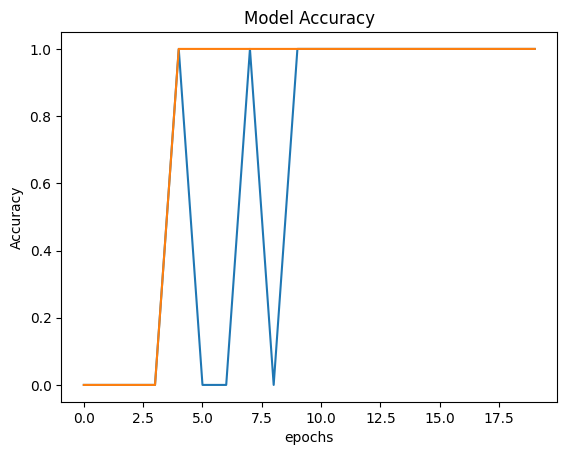

In [62]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")


In [63]:
model.save("chatbot_model")

In [64]:
model.load_weights("chatbot_model")

In [65]:
pred_results = model.predict(([inputs_test, queries_test]))

1/1 [==============================] - 1s 862ms/step


In [66]:
Test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [67]:
story = ' '.join(word for word in Test_data[0][0])

In [68]:
story

'Mary got the milk there . John moved to the bedroom .'

In [69]:
query = ' '.join(word for word in Test_data[13][1])

In [70]:
query

'Is Mary in the kitchen ?'

In [71]:
Test_data[10][2]

'yes'

In [72]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

    print("predicted answer is", k)
    print("probability of certainity is", pred_results[0][val_max])

predicted answer is no
probability of certainity is 0.2899962


In [73]:
type(inputs_train)

numpy.ndarray